## TRABAJO PRACTICO DATA SCIENCE CODERHOUSE

**Alumna**: Emilia Cúneo

### INTRODUCCION

Este trabajo tiene por objetivo predecir el precio de un auto usado. Para esto se utilizará un dataset extraido de kaggle, y el archivo llamado car details v4.  
Link : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data?select=car+details+v4.csv 
Este dataset contiene datos de autos usados. Se pueden ver distintas columnas con caracteristicas que permitirá analizar la relación entre el precio y esas variables.

### IMPORTACION DE DATOS

In [7]:
#Se importan las librerias que usaremos en el trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### CARGA DE DATOS

In [31]:
# Se sube el archivo
df_autos = pd.read_csv("car details v4.csv")

### EXPLORACION DE DATOS

In [35]:
#Primero se usa el comando head para tener un primer vistazo de la tabla y los valores
df_autos.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [37]:
#Tambien usamos el comando info para tener un primer vistazo de la información general del dataset
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

A partir de estos dos comandos que usamos se puede ver que el dataset tiene 20 columnas o atributos y 2059 registros o filas. También se observa que no todas las columnas tienen la cantidad total de registros no nulos,es decir que existen valores faltantes. Por lo tanto hay que ver como tratar a estos valores.  
Por otro lado, al ver los primeros registros y las columnas de este dataset, se describe a que se refiere cada columna:  
. **Make**: Marca del auto  
. **Model**: Modelo del auto  
. **Price**: Precio del auto en INR (en rupias indias)  
. **Year**: Año de fabricación del auto  
. **Kilometer**: Kilometros manejados totales del auto  
. **Fuel Type**: Tipo de combustible que usa el auto  
. **Transmission**: Tipo de transmisición del auto  
. **Location**: Lugar en donde se está vendiendo el auto  
. **Color**: Color del auto  
. **Owner**: Tipo de dueño(primero, segundo, etc)  
. **Seller type**: Tipo de vendedor  
. **Engine**: Capacidad del motor en cc  
. **Max power**: Potencia máxima del auto medida en BHP y RPM  
. **Max torque**: Torque maximo en Nm y RPM  
. **Drivetrain**: Tipo de tracción del auto  
. **Lenght**: Longitud del auto en mm  
. **Width**: Ancho del auto en mm  
. **Height**: Altura del auto en mm  
. **Seating capacity**: Cantidad de personas que entran en el auto  
. **Fuel tank capacity**: Capacidad máxima del tanque de combustible del auto en lts.  

Por último, se puede ver los tipos de datos que tiene el dataset: Se observan datos enteros, datos de tipo float y tipo object.

In [39]:
#Se muestra registros y atributos, aunque con la instrucción info también puedo verlo.
df_autos.shape

(2059, 20)

In [41]:
# Usamos describe y ponemos include all para que inicluya también a las variables categóricas, no solo a las 
# numéricas
df_autos.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,2059,33,Maruti Suzuki,440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,2059,1050,X1 sDrive20d xLine,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,2059.0,NaN,NaN,NaN,1702991.696455,2419880.635434,49000.0,484999.0,825000.0,1925000.0,35000000.0
Year,2059.0,NaN,NaN,NaN,2016.425449,3.363564,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2059.0,NaN,NaN,NaN,54224.714424,57361.721314,0.0,29000.0,50000.0,72000.0,2000000.0
Fuel Type,2059,9,Diesel,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,2059,2,Manual,1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2059,77,Mumbai,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,2059,17,White,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,2059,6,First,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Con esta información se puede ver un resumen estadístico de las columnas del data frame. Por ejemplo, se puede ver con el valor count el número de valores no nulos, o sea que se reconfirma que hay datos faltantes en algunas columnas. Para las variables numéricas, se encuentra la media, la desviación estandar, valores mínimos y máximos, la mediana y  los diferentes cuartiles.Para variables categóricas se pueden ver el número de valores no nulos, como se mencionó anteriormente, también la cantidad de valores únicos, el valor más frecuente y su frecuencia.


### TRATAMIENTO DE DATOS NULOS

In [77]:
# Se detectan y trabaja con los datos nulos. Para eso se usa una funcion que arma una tabla con las variables con 
# datos faltantes y cantidades y tambien con sus porcentajes para ver que tan representativos son
def get_tabla_valores_faltantes(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis = 1)
    mis_val_table_columns = mis_val_table.rename(columns = {0: 'VALORES FALTANTES', 1: '% DEL TOTAL DE VALORES'})
    mis_val_table_columns = mis_val_table_columns[mis_val_table_columns.iloc[:,1] != 0]
    mis_val_table_columns = mis_val_table_columns.sort_values('% DEL TOTAL DE VALORES', ascending = False).round(1)
    print('El data frame tiene ' + str(df.shape[1]) + ' columnas.\n' 'Hay ' + str(mis_val_table_columns.shape[0]) + 
          ' columnas con valores faltantes')
    return mis_val_table_columns
    

In [81]:
# Se pasa como argumento de la funcion el data frame que estamos usando
get_tabla_valores_faltantes(df_autos)

El data frame tiene 20 columnas.
Hay 9 columnas con valores faltantes


,VALORES FALTANTES,% DEL TOTAL DE VALORES
Drivetrain,136,6.6
Fuel Tank Capacity,113,5.5
Engine,80,3.9
Max Power,80,3.9
Max Torque,80,3.9
Length,64,3.1
Width,64,3.1
Height,64,3.1
Seating Capacity,64,3.1


A partir de esta información, se puede ver que no son datos no significativos los que faltan, si fueran muy pocos datos, podriamos elegir la opción de eliminarlos. En este caso, se decide que no se eliminarán los registroos sino que se imputarán los nulos para poder trabajar, teniendo en cuenta que no queremos descartar otros datos que si estan de la misma fila. Para las variables numéricas se rellenarán los datos con la media de los valores. Esto se decide así por las variables que faltan(altura, ancho, largo del auto). Hay otras medidas más importantes(como por ejemplo el precio, el año del auto, etc) que no tienen datos faltantes. Entonces tomando esta decisión no generará cambios tan importantes en los análisis. Al ser datos de autos, otra estrategia podría ser buscar y completar esos valores, teniendo en cuenta que de buscarlos en internet podrían encontrarse. En este trabajo en particular no se eligirá esta opción porque llevaría mucho tiempo, pero sería una opción de ser datos sumamente importantes para el objetivo de análisis que se busca.

In [174]:
# Se imputan los nulos de las variables numericas utlizando la media
for col in df_autos.select_dtypes(include = 'number').columns:
    df_autos[col].fillna(df_autos[col].mean())

In [178]:
# Se comprueba que no existan mas los valores faltantes en las variables numericas 
get_tabla_valores_faltantes(df_autos)

El data frame tiene 20 columnas.
Hay 4 columnas con valores faltantes


,VALORES FALTANTES,% DEL TOTAL DE VALORES
Drivetrain,136,6.6
Engine,80,3.9
Max Power,80,3.9
Max Torque,80,3.9


Por otro lado, se decide trabajar con la moda para la variable categorica Drivetrain, es decir con el valor mas frecuente. Asi esto enfatiza el resultado que se obtendria. Y para las otras variables, se completa el valor como desconocido, creando otra cateoría que aparecerá en los resultados, pero no se tendrá en cuenta para los resultados.  
Por último, se eliminan espacios en blanco y se pasan a minusculas todos los valores de las variables categóricas, para que quede el data fram más ordenado.


In [208]:
for i in df_autos.select_dtypes(include = 'object').columns:
    df_autos[i] = df_autos[i].str.strip()

In [218]:
for i in df_autos.select_dtypes(include = 'object').columns:
    df_autos[i] = df_autos[i].str.lower()

In [241]:
df_autos['Max Torque'] = df_autos['Max Torque'].fillna('Desconocido')

In [245]:
df_autos['Max Power'] = df_autos['Max Power'].fillna('Desconocido') 

In [402]:
df_autos['Engine'] = df_autos['Engine'].fillna('Desconocido') 

In [259]:
df_autos['Drivetrain'] = df_autos['Drivetrain'].fillna(df_autos['Drivetrain'].mode()[0])

In [261]:
# Se confirma que no existen más datos faltantes
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max Power           2059 non-null   object 
 13  Max Torque          2059 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   float64
 16  Width 

## VISUALIZACION DE DATOS

Se mostrarán algunos gráficos a continuación con el fin de hacer un análisis de los datos del data frame.

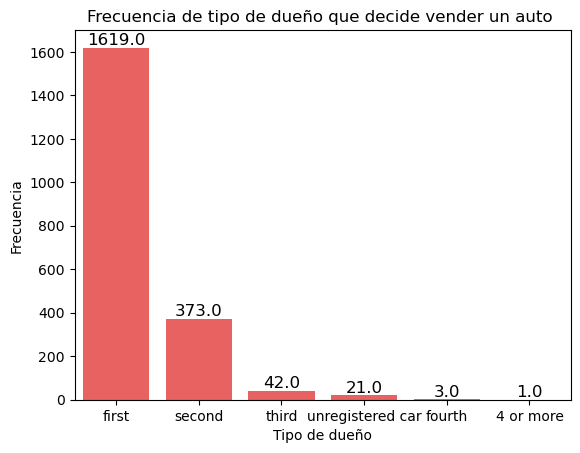

In [303]:
# Grafico de barra con seaborn
cuenta_owner = df_autos['Owner'].value_counts()
ax = sns.barplot(x = cuenta_owner.index, y = cuenta_owner.values, alpha = 0.7, color = 'red')
plt.title('Frecuencia de tipo de dueño que decide vender un auto ')
plt.xlabel('Tipo de dueño')
plt.ylabel('Frecuencia')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black',
               xytext = (0,2),textcoords = 'offset points')

A partir de este gráfico se puede ver que la mayoría de datos disponibles en el data frame corresponden a autos que fueron vendidos por su primer dueño y como va disminuyendo a medida que aumenta el número de dueños.

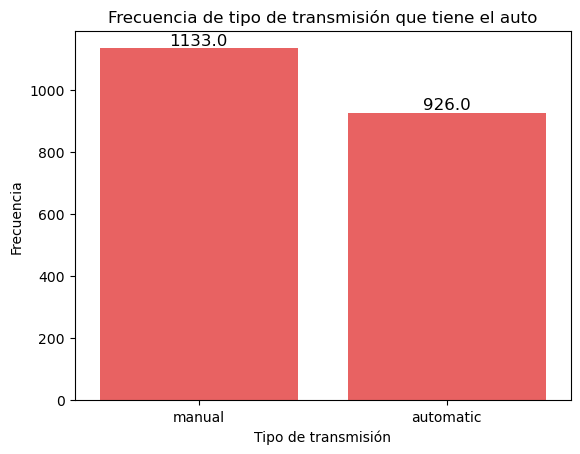

In [301]:
#Gráfico de barras con seaborn
cuenta_transmission = df_autos['Transmission'].value_counts()
ax = sns.barplot(x = cuenta_transmission.index, y = cuenta_transmission.values, alpha = 0.7, color = 'red')
plt.title('Frecuencia de tipo de transmisión que tiene el auto')
plt.xlabel('Tipo de transmisión')
plt.ylabel('Frecuencia')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black',
               xytext = (0,2),textcoords = 'offset points')

En este gráfico de barras se observa que la mayoría de los autos son de transmisión manual, aunque tampoco es una diferencia tan grande. Se tienen datos suficientes como para poder comprobar si el tipo de transmisión interviene o no en el precio.

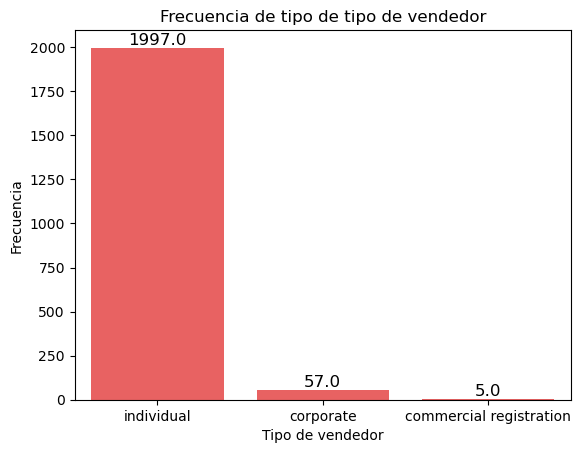

In [405]:
#Gráfico de barras con seaborn
cuenta_vendedor = df_autos['Seller Type'].value_counts()
ax = sns.barplot(x = cuenta_vendedor.index, y = cuenta_vendedor.values, alpha = 0.7, color = 'red')
plt.title('Frecuencia de tipo de tipo de vendedor')
plt.xlabel('Tipo de vendedor')
plt.ylabel('Frecuencia')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black',
               xytext = (0,2),textcoords = 'offset points')

Se observa que casi la totalidad de las ventas de autos usados se realizan en forma individual.

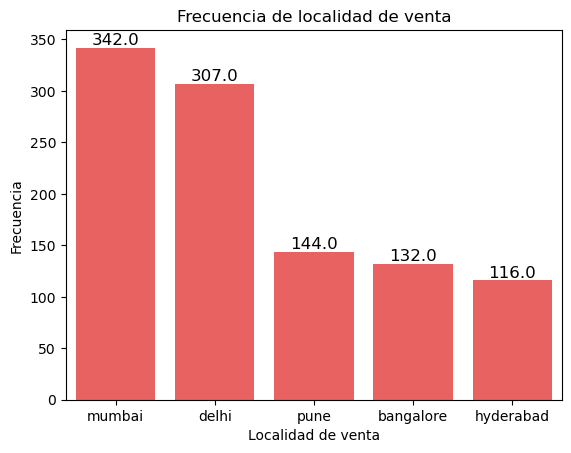

In [409]:
#Gráfico de barras con seaborn
cuenta_localidad = df_autos['Location'].value_counts()
top_localidades = cuenta_localidad.head(5)
ax = sns.barplot(x = top_localidades.index, y = top_localidades.values, alpha = 0.7, color = 'red')
plt.title('Frecuencia de localidad de venta')
plt.xlabel('Localidad de venta')
plt.ylabel('Frecuencia')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'baseline',
               fontsize = 12, color = 'black',
               xytext = (0,2),textcoords = 'offset points')

En este gráfico se ven las localidades con las mayores ventas. Se decidió mostrar las primeras cinco localidades mas importantes en término de ventas, ya que hay numerosas opciones, para poder entender el gráfico.

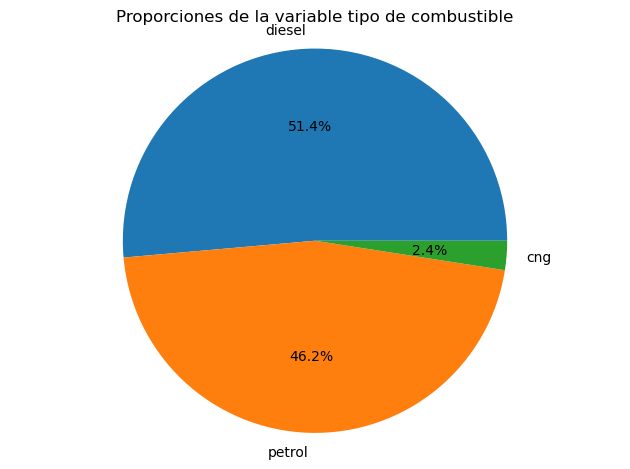

In [426]:
#Gráfico de torta con matplotlib
cantidad_combustible = df_autos['Fuel Type'].value_counts()
top_combustible = cantidad_combustible.head(3)
plt.pie(top_combustible, labels = top_combustible.index, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Proporciones de la variable tipo de combustible')
plt.tight_layout()


Se puede ver que la mayoria de los autos tiene diesel, pero muy seguido de petrol.

Text(0, 0.5, 'Distribucion')

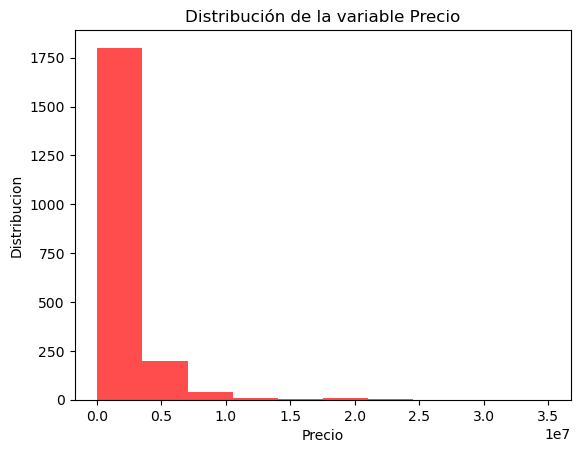

In [430]:
#Histograma con matplotlib
fig,ax = plt.subplots()
ax.hist(df_autos.Price, color = 'red', alpha = 0.7)
plt.title('Distribución de la variable Precio')
plt.xlabel('Precio')
plt.ylabel('Distribucion')

Se puede observar como los valores de precio se acumulan considerablemente al inicio del gráfico en los valores más bajos de precios.

<Axes: >

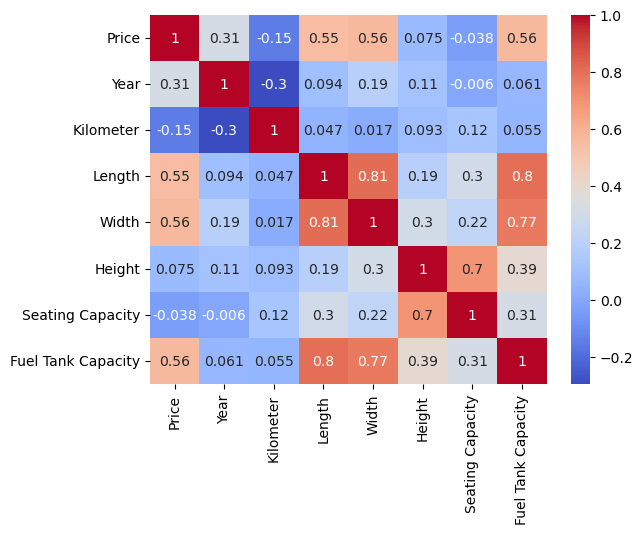

In [433]:
#Heatmap de las variables numericas en seaborn
df_numerico = df_autos.select_dtypes(include= ['float64', 'int64'])
corr = df_numerico.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

En este gráfico se puede ver la correlación entre las variables numéricas. Los valores cercanos a uno indican una correlación positiva, es decir que cuando una variable aumenta la otra también. Los valores cercanos a -1 indican una correlacion negativa, es decir que cunado una variable aumenta, la otra disminuye. Por ejemplo, se puede visualizar una correlación positiva entre el tamaño del auto(longitud y ancho) y la capacidad del tanque de combustible. Tambien entre la longitud y el ancho del auto. A su vez, entre el precio y la capacidad del tanque de combustible. Por lo tanto a más dimensiones el auto, mayor su tanque de combustible y mayor su precio.

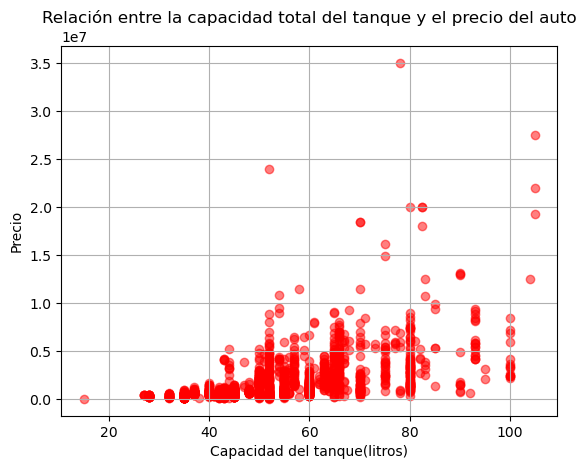

In [436]:
#Gráfico de dispersión con matplotlib
x = df_autos['Fuel Tank Capacity']
y = df_autos['Price']
fig,ax = plt.subplots()
ax.scatter(x,y,alpha = 0.5, color = 'red')
plt.title('Relación entre la capacidad total del tanque y el precio del auto')
plt.xlabel('Capacidad del tanque(litros)')
plt.ylabel('Precio')
plt.grid()

En este grafico se puede ver que a medida que aumenta la capacidad del tanque aumenta el precio. A su vez, podemos ver algunos outliers. Los cuales pueden ser debido a que hay alguna marca de auto cara o un auto lujoso, que pese a tener un tanque pequeño sale más caro y lo mismo a la inversa. Pero en lineas generales se puede ver que a medida que el tanque aumenta el precio también.

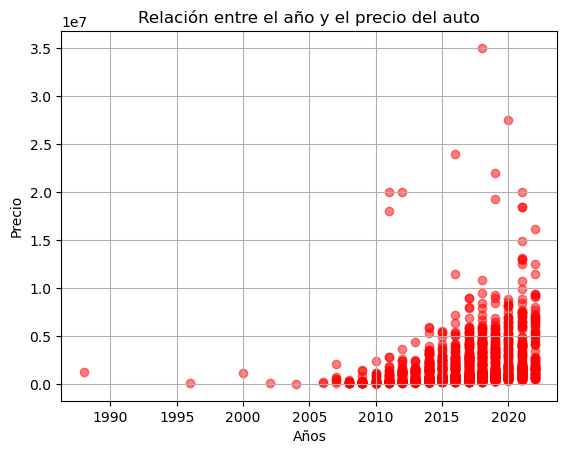

In [439]:
#Gráfico de dispersión con matplotlib
x = df_autos['Year']
y = df_autos['Price']
fig,ax = plt.subplots()
ax.scatter(x,y,alpha = 0.5, color = 'red')
plt.title('Relación entre el año y el precio del auto')
plt.xlabel('Años')
plt.ylabel('Precio')
plt.grid(True)

En este gráfico de dispersión se puede ver que a medida que aumenta el año de fabricación aumenta el precio.

Text(0, 0.5, 'Precios')

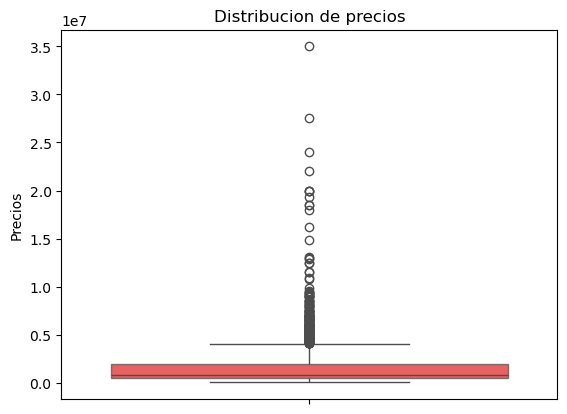

In [442]:
ax = sns.boxplot(y = 'Price', data = df_autos, color = 'red')
for box in ax.patches:
    box.set_alpha(0.7)
plt.title('Distribucion de precios')
plt.ylabel('Precios')

A partir de este gráfico se puede ver que la distribución de precios se concentra(al igual que vimos en el histograma), en los precios más bajos. También este gráfico permite ver los diferentes cuartiles y donde se ubica la mediana. Otra cosa que se puede ver es que todos los outliers, es decir los puntos que estan fuera de la caja, se dan para los precios más altos, no hay ninguno por debajo. Esto puede hablar de autos con características especiales que de hagan que el precio sea bastante más alto. Se puede ver también qeu la caja y la mediana tienen una inclinación a estar más cerca al bigote de abajo, es decir que tienen una tendencia a la asimetría y a estar más cerca de los precios más bajos, que altos.Esto últimmo coincide con lo que se vió anteriormente en el Histograma.

Text(0.5, 0, 'Forma de venta')

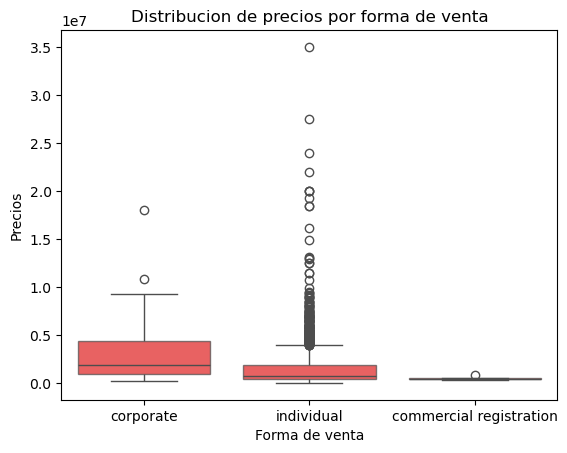

In [339]:
ax = sns.boxplot(x = 'Seller Type', y = 'Price', data = df_autos, color = 'red')
for box in ax.patches:
    box.set_alpha(0.7)
plt.title('Distribucion de precios por forma de venta')
plt.ylabel('Precios')
plt.xlabel('Forma de venta')

En este gráfico podemos ver que la tendencia del precio que vimos anteriormente se mantiene. Lo que podemos ver de diferente es que el rango de precios típicos es un poco más amplio en la forma de venta corporate, mientras que con bigotes mas cortos en la individual. Mientras que no se ven muchos outliers en corporate, en la forma de venta individual se reflejan la mayoría de los outliers que se detectaron en el gráfico anterior. 

Text(0.5, 0, 'Tipo de dueño')

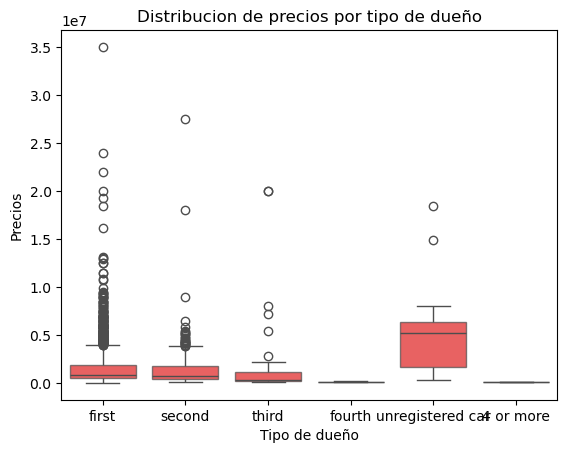

In [446]:
ax = sns.boxplot(x = 'Owner', y = 'Price', data = df_autos, color = 'red')
for box in ax.patches:
    box.set_alpha(0.7)
plt.title('Distribucion de precios por tipo de dueño')
plt.ylabel('Precios')
plt.xlabel('Tipo de dueño')

En este caso que se evaluan los distintos tipos de dueños, vemos como las tendencias son bastante parecidas, es decir que no afectaría enormemente al análisis si el dueño es primero o segundo dueño. Se puede ver un pequeño cambio en tercer dueño, pero eso también puede darse por la cantidad de años que pasaron o los kilometros recorridos, más que el número de dueño. Si se ve que para la categoría unregistered si hay un cambio más notorio, va a requerir hacer un análisis más específico de esos datos.